In [1]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.airlinequality.com/airline-reviews/british-airways'

In [2]:
reviews = {'name':[],'country':[], 'date':[], 'trip_verified':[],'rating':[],
           'aircraft':[], 'type_of_traveller':[], 'seat_type':[], 'route':[],
           'date_flown':[], 'seat_comfort': [], 'cabin_service':[],
           'food_beverages':[], 'entertainment':[], 'ground_service':[],
           'wifi':[], 'value_for_money':[], 'recommended':[]
          }


def find_name(single_review):
  """Finds the name of the reviewer."""
  present = single_review.find('span', {'itemprop': 'name'})
  if present:
    value = single_review.find('span', {'itemprop': 'name'}).get_text(strip=True)
  else:
    value = None
  reviews.setdefault('name', []).append(value)


def find_country(single_review):
  """Finds the country the reviewer is from."""
  h3_tag = single_review.find('h3', class_='text_sub_header userStatusWrapper')
  country_element = h3_tag.text
  value = country_element.split('(')[-1].split(')')[0].strip()
  reviews.setdefault('country', []).append(value)


def find_date(single_review):
  """Finds the date on which review was given."""
  present = single_review.find('time')
  if present:
    value = single_review.find('time').get('datetime')
  else:
    value = None
  reviews.setdefault('date', []).append(value)


def is_verified(single_review):
  """Finds if the reviewer is verified or not."""
  present = single_review.find('div', {'itemprop': 'reviewBody'}).get_text(strip=True)
  if 'Trip Verified' in present:
    value = 'Trip Verified'
  elif 'Not Verified' in present:
    value = 'Not Verified'
  else:
    value = None
  reviews.setdefault('trip_verified', []).append(value)


def find_rating(single_review):
  """Finds the overall rating of the reviewer."""
  present = single_review.find('span', {'itemprop':'ratingValue'})
  if present:
    value = single_review.find('span', {'itemprop':'ratingValue'}).get_text(strip=True)
  else:
    value = None
  reviews.setdefault('rating', []).append(value)


def find_aircraft(single_review):
  """Finds if the review includes an aircraft type,
  if True the type of aircraft will be appended,
  else appends None to reviews dic."""
  value = single_review.find('td', {'class':'review-rating-header aircraft'})
  if value:
    value = single_review.find('td', {'class':'review-value'})
    reviews.setdefault('aircraft', []).append(value.get_text(strip=True))
  else:
    reviews.setdefault('aircraft', []).append(None)


def find_traveller(single_review):
  """Finds the type of traveller mentioned in the review."""
  present = single_review.find('td', {'class':'review-rating-header type_of_traveller'})
  if present:
    value = single_review.find('td', {'class':'review-rating-header type_of_traveller'}
                               ).find_next('td', {'class':'review-value'}).get_text(strip=True)
  else:
    value = None
  reviews.setdefault('type_of_traveller', []).append(value)


def find_seat(single_review):
  """Finds the type of seat used by the reviewer."""
  present = single_review.find('td', {'class':'review-rating-header cabin_flown'})
  if present:
    value = single_review.find('td', {'class':'review-rating-header cabin_flown'}
                               ).find_next('td', {'class':'review-value'}).get_text(strip=True)
  else:
    value = None
  reviews.setdefault('seat_type', []).append(value)


def find_route(single_review):
  """Finds the travel route taken by the reviewer."""
  present = single_review.find('td', {'class':'review-rating-header route'})
  if present:
    value = single_review.find('td', {'class':'review-rating-header route'}
                               ).find_next('td', {'class':'review-value'}).get_text(strip=True)
  else:
    value = None
  reviews.setdefault('route', []).append(value)


def find_date_flown(single_review):
  """Finds the date the reviewer has flown."""
  present = single_review.find('td', {'class':'review-rating-header date_flown'})
  if present:
    value = single_review.find('td', {'class':'review-rating-header date_flown'}
                               ).find_next('td', {'class':'review-value'}).get_text(strip=True)
  else:
    value = None
  reviews.setdefault('date_flown', []).append(value)


def find_seat_comfort(single_review):
  """Finds the star rating given in the review for 'Seat Comfort'."""
  present = single_review.find('td', {'class':'review-rating-header seat_comfort'})
  if present:
    value = single_review.find('td', {'class':'review-rating-header seat_comfort'}).find_next('td',
                            {'class':'review-rating-stars stars'}).find_all('span', class_='star fill')
    star_rating = len(value)
  else:
    star_rating = None
  reviews.setdefault('seat_comfort', []).append(star_rating)


def find_cabin_service(single_review):
  """Finds the star rating given in the review for 'Cabin Staff Service'."""
  present = single_review.find('td', {'class':'review-rating-header cabin_staff_service'})
  if present:
    value = single_review.find('td', {'class':'review-rating-header cabin_staff_service'}).find_next('td',
                            {'class':'review-rating-stars stars'}).find_all('span', class_='star fill')
    star_rating = len(value)
  else:
    star_rating = None
  reviews.setdefault('cabin_service', []).append(star_rating)


def find_food_beverages(single_review):
  """Finds the star rating given in the review for 'Food & Beverages'."""
  present = single_review.find('td', {'class':'review-rating-header food_and_beverages'})
  if present:
    value = single_review.find('td',{'class':'review-rating-header food_and_beverages'}).find_next('td',
                              {'class':'review-rating-stars stars'}).find_all('span', class_='star fill')
    star_rating = len(value)
  else:
    star_rating = None
  reviews.setdefault('food_beverages', []).append(star_rating)


def find_entertainment(single_review):
  """Finds the star rating given in the review for 'Inflight Entertainment'."""
  present = single_review.find('td', {'class':'review-rating-header inflight_entertainment'})
  if present:
    value = single_review.find('td',{'class':'review-rating-header inflight_entertainment'}).find_next('td',
                              {'class':'review-rating-stars stars'}).find_all('span', class_='star fill')
    star_rating = len(value)
  else:
    star_rating = None
  reviews.setdefault('entertainment', []).append(star_rating)


def find_ground_service(single_review):
  """Finds the star rating given in the review for 'Ground Service'."""
  present = single_review.find('td', {'class':'review-rating-header ground_service'})
  if present:
    value = single_review.find('td',{'class':'review-rating-header ground_service'}).find_next('td',
                              {'class':'review-rating-stars stars'}).find_all('span', class_='star fill')
    star_rating = len(value)
  else:
    star_rating = None
  reviews.setdefault('ground_service', []).append(star_rating)


def find_wifi(single_review):
  """Finds the star rating given in the review for 'Wifi & Connectivity'."""
  present = single_review.find('td', {'class':'review-rating-header wifi_and_connectivity'})
  if present:
    value = single_review.find('td',{'class':'review-rating-header wifi_and_connectivity'}).find_next('td',
                              {'class':'review-rating-stars stars'}).find_all('span', class_='star fill')
    star_rating = len(value)
  else:
    star_rating = None
  reviews.setdefault('wifi', []).append(star_rating)


def find_value_for_money(single_review):
  """Finds the star rating given in the review for 'Value For Money'."""
  present = single_review.find('td', {'class':'review-rating-header value_for_money'})
  if present:
    value = single_review.find('td',{'class':'review-rating-header value_for_money'}).find_next('td',
                              {'class':'review-rating-stars stars'}).find_all('span', class_='star fill')
    star_rating = len(value)
  else:
    star_rating = None
  reviews.setdefault('value_for_money', []).append(star_rating)


def find_recommended(single_review):
  """Finds whether reviewer recommends or not as yes/no"""
  present = single_review.find('td', {'class':'review-rating-header recommended'})
  if present:
    value = single_review.find('td',{'class':'review-rating-header recommended'}
                               ).find_next('td').get_text(strip=True)
  else:
    value = None
  reviews.setdefault('recommended', []).append(value)


def scrape_reviews(current_page_url):
  # Send a GET request to the URL
  response = requests.get(current_page_url)
  # Check if the request was successful (status code 200)
  if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all review elements on the page
    all_reviews = soup.find_all('article', {'itemprop': 'review'})

    for idx, single_review in enumerate(all_reviews, start=1):
      for key in reviews:
        if key == 'name':
          find_name(single_review)
        elif key == 'country':
          find_country(single_review)
        elif key == 'date':
          find_date(single_review)
        elif key == 'trip_verified':
          is_verified(single_review)
        elif key == 'rating':
          find_rating(single_review)
        elif key == 'aircraft':
          find_aircraft(single_review)
        elif key == 'type_of_traveller':
          find_traveller(single_review)
        elif key == 'seat_type':
          find_seat(single_review)
        elif key == 'route':
          find_route(single_review)
        elif key == 'date_flown':
          find_date_flown(single_review)
        elif key == 'seat_comfort':
          find_seat_comfort(single_review)
        elif key == 'cabin_service':
          find_cabin_service(single_review)
        elif key == 'food_beverages':
          find_food_beverages(single_review)
        elif key == 'entertainment':
          find_entertainment(single_review)
        elif key == 'ground_service':
          find_ground_service(single_review)
        elif key == 'wifi':
          find_wifi(single_review)
        elif key == 'value_for_money':
          find_value_for_money(single_review)
        elif key == 'recommended':
          find_recommended(single_review)
  else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Iterate through the pages
num_pages = 371

for page_number in range(1, num_pages + 1):
  # Generate the URL for the current page
  current_page_url = f"{url}/page/{page_number}/"
  print(current_page_url)
  # Call the function to scrape reviews from the current page
  scrape_reviews(current_page_url)


# Printing only values and matching them to check if something is missing
needed_values = num_pages*(len(reviews.keys())*10)
current_values = sum(map(len, reviews.values()))

# Since last page(371), as of writing the code does not contain 10 reviews
# This condition is to avoid the error from below (which assumes 10 reviews per page)
if num_pages <= 370:
  print(f'''NEEDED total amount of values: {needed_values} (Calculated per page)
CURRENT total amount of values: {current_values} \n''')
else:
  print(f'Page is greater than 370, *Needed amount of values = Total Reviews \n'
        f'(Which means you must scrape all the pages(To get all the reviews) \n'
        f'or just ignore the error below)')

  # Scraping the total reviews values from the website(url-page1)
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  total_reviews_elements = soup.find_all('span', {'itemprop': 'reviewCount'})
  needed_values = [int(element.text.strip()) for element in total_reviews_elements]
  needed_values = needed_values[0]*18
  print(f'''NEEDED total amount of values: {needed_values} [Scraped from site, 'Total Reviews'*18(keys)]
CURRENT total amount of values: {current_values} \n''')

# This condition *can be removed in the future if needed
if needed_values == current_values:
  print('Yay!, Number of total values match the needed amount! \n')
else:
  print('Error!, Number of total values do not match needed amount! \n')

# Printing individual keys and the respective total values currently present.
for key, values in reviews.items():
  print(f'No. of values in key -> "{key}": {len(values)}')


https://www.airlinequality.com/airline-reviews/british-airways/page/1/
https://www.airlinequality.com/airline-reviews/british-airways/page/2/
https://www.airlinequality.com/airline-reviews/british-airways/page/3/
https://www.airlinequality.com/airline-reviews/british-airways/page/4/
https://www.airlinequality.com/airline-reviews/british-airways/page/5/
https://www.airlinequality.com/airline-reviews/british-airways/page/6/
https://www.airlinequality.com/airline-reviews/british-airways/page/7/
https://www.airlinequality.com/airline-reviews/british-airways/page/8/
https://www.airlinequality.com/airline-reviews/british-airways/page/9/
https://www.airlinequality.com/airline-reviews/british-airways/page/10/
https://www.airlinequality.com/airline-reviews/british-airways/page/11/
https://www.airlinequality.com/airline-reviews/british-airways/page/12/
https://www.airlinequality.com/airline-reviews/british-airways/page/13/
https://www.airlinequality.com/airline-reviews/british-airways/page/14/
h

In [3]:
import pandas as pd

df = pd.DataFrame(reviews)
print(df.shape)



df.head()

(3705, 18)


,name,country,date,trip_verified,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_service,food_beverages,entertainment,ground_service,wifi,value_for_money,recommended
0,F Orlandino,United Kingdom,2023-12-03,Trip Verified,1,None,Family Leisure,Economy Class,Palma de Mallorca to Gatwick,December 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no
1,A Gittens,United Kingdom,2023-11-30,Trip Verified,5,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,November 2023,2.0,3.0,3.0,1.0,4.0,1.0,3,yes
2,Bert Vissers,Switzerland,2023-11-26,Trip Verified,1,None,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,July 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no
3,E Smyth,United Kingdom,2023-11-23,Trip Verified,9,A380,Couple Leisure,First Class,London to Miami,November 2023,5.0,5.0,5.0,5.0,4.0,2.0,4,yes
4,L Keele,Germany,2023-11-19,Trip Verified,1,None,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no


In [4]:
# Saving dataframe as csv file
df.to_csv('data.csv', index=False)

No     2210
Yes    1495
Name: recommended, dtype: int64


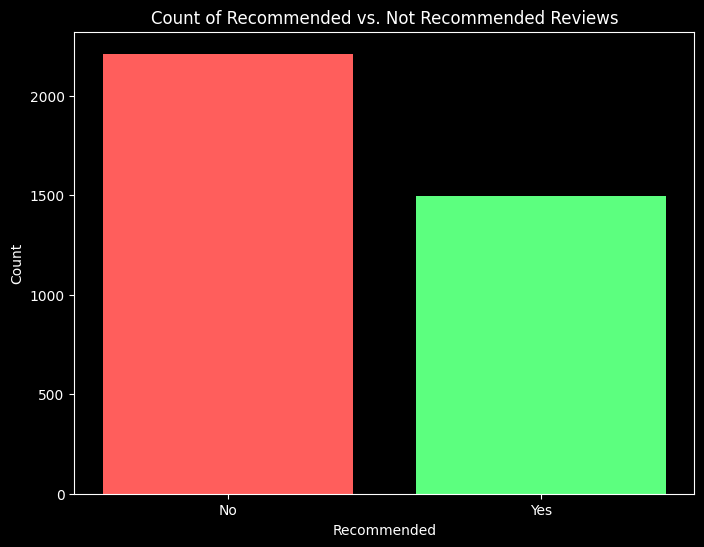

In [14]:
import matplotlib.pyplot as plt

recommended_counts = df['recommended'].str.capitalize().value_counts()
print(recommended_counts)
# Bar chart to visualize type of recommendations
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
plt.bar(recommended_counts.index, recommended_counts.values, color=['#ff5e5c', '#5cff7f'])
plt.title('Count of Recommended vs. Not Recommended Reviews')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()

recommended              0.0     1.0
country                             
Argentina                3.0     3.0
Australia               94.0    63.0
Austria                  2.0     9.0
Bahrain                  1.0     0.0
Barbados                 0.0     1.0
...                      ...     ...
Ukraine                  0.0     1.0
United Arab Emirates    16.0     7.0
United Kingdom        1206.0  1112.0
United States          261.0   156.0
Vietnam                  0.0     1.0

[72 rows x 2 columns]


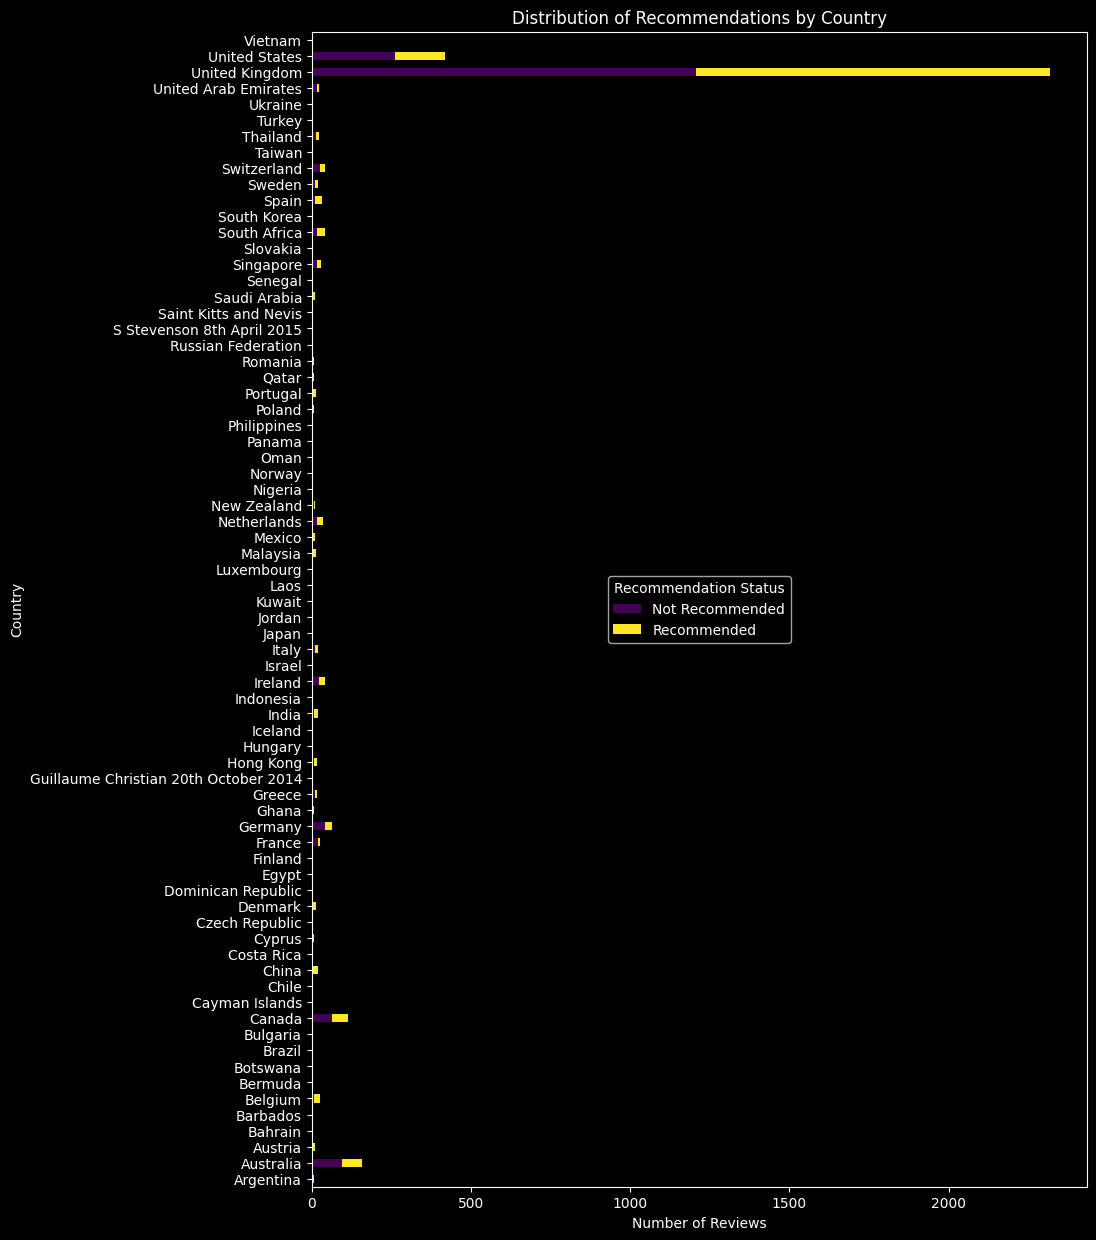

In [46]:

# Convert 'Yes' and 'No' to 1 and 0
df['recommended'] = df['recommended'].map({'Yes': 1, 'No': 0})

# Convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Update 'recommended' column based on 'rating'
df['recommended'] = df.apply(lambda row: 'Yes' if row['rating'] >= 5
                             and pd.isna(row['recommended'])
                             else 'No' if row['rating'] < 5
                             and pd.isna(row['recommended'])
                             else row['recommended'], axis=1)

recommendation_counts = df.groupby('country')['recommended'].value_counts().unstack().fillna(0)
print(recommendation_counts)

# Plot a horizontal bar chart
ax = recommendation_counts.plot(kind='barh', stacked=True, colormap='viridis', figsize=(10, 15))

# Set labels and title
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Country')
ax.set_title('Distribution of Recommendations by Country')
# Set the legend title and labels
legend_labels = ['Not Recommended', 'Recommended']
legend_title = 'Recommendation Status'
plt.legend(legend_labels, title=legend_title, loc='center')

# Show the plot
plt.show()